In [1]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch
import requests

url = "https://images.chosun.com/resizer/SuTI7e2cElrCYzHq_x_jcEiB2NA=/616x0/smart/cloudfront-ap-northeast-1.images.arcpublishing.com/chosun/C22V7RSD2RFLRE5N6LBHIDLC6Y.jpg"
image = Image.open(requests.get(url, stream=True).raw)

model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes


# print results
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

c:\Users\whstk\anaconda3\envs\torch38\lib\site-packages\transformers\utils\generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/26.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

Detected chair with confidence 0.951 at location [379.76, 248.61, 488.55, 394.71]
Detected person with confidence 0.949 at location [253.78, 185.62, 353.87, 343.16]
Detected person with confidence 0.972 at location [187.64, 178.14, 274.6, 334.71]
Detected chair with confidence 0.95 at location [155.28, 234.54, 250.14, 367.41]
Detected chair with confidence 0.921 at location [13.01, 190.54, 61.06, 247.35]
Detected person with confidence 0.915 at location [184.01, 159.0, 207.36, 194.25]
Detected person with confidence 0.941 at location [207.04, 157.47, 238.15, 194.78]
Detected person with confidence 0.951 at location [476.93, 168.91, 521.92, 222.25]
Detected chair with confidence 0.94 at location [438.43, 210.66, 483.35, 260.46]


In [7]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image, ImageDraw
import torch

# 로컬 파일에서 이미지를 로드합니다.
image_path = './office_image/21.jpg'
image = Image.open(image_path)

# 모델을 로드합니다.
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

# 이미지를 처리합니다.
inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# 결과를 후처리합니다.
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# 이미지에 박스를 그립니다.
draw = ImageDraw.Draw(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score.item() >= 0.80:
        label_name = model.config.id2label[label.item()]
        if label_name in ["dining table", "person"]:
            box = [round(i, 2) for i in box.tolist()]
            draw.rectangle(box, outline="red", width=3)
            draw.text((box[0], box[1]), f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}", fill="red")

# 수정된 이미지를 보여줍니다.
image.show()


In [5]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch

# 로컬 파일에서 이미지를 로드합니다.
image_path = './office_image/21.jpg'
image = Image.open(image_path)

# 모델을 로드합니다.
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

# 이미지를 처리합니다.
inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# 결과를 후처리합니다.
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# 각 객체의 개수를 계산합니다.
diningtable_count = sum(label.item() == model.config.label2id['dining table'] for label in results["labels"])
person_count = sum(label.item() == model.config.label2id['person'] for label in results["labels"])

# 결과를 출력합니다.
print(f"Detected {diningtable_count} diningtable(s)")
print(f"Detected {person_count} person(s)")


Detected 3 diningtable(s)
Detected 8 person(s)


In [17]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image, ImageDraw

# 로컬 파일에서 이미지를 로드합니다.
image_path = './office_image/21.jpg'
image = Image.open(image_path)

# 모델과 이미지 프로세서를 로드합니다.
image_processor = AutoImageProcessor.from_pretrained("AdamCodd/yolos-small-person")
model = AutoModelForObjectDetection.from_pretrained("AdamCodd/yolos-small-person")

# 이미지를 처리합니다.
inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# 결과를 후처리합니다.
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.7, target_sizes=target_sizes)[0]

# 이미지에 박스를 그리고 사람 수를 세기
draw = ImageDraw.Draw(image)
person_count = 0
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score.item() >= 0.50:
        box = [round(i, 2) for i in box.tolist()]
        if model.config.id2label[label.item()] == 'person':
            person_count += 1
            draw.rectangle(box, outline="red", width=3)
            draw.text((box[0], box[1]), f"Confidence: {round(score.item(), 3)}", fill="red")

# 결과 이미지를 보여줍니다.
image.show()

# 검출된 사람 수를 출력합니다.
print(f"Detected {person_count} person(s)")


Detected 7 person(s)


Estimated number of people: 78.76


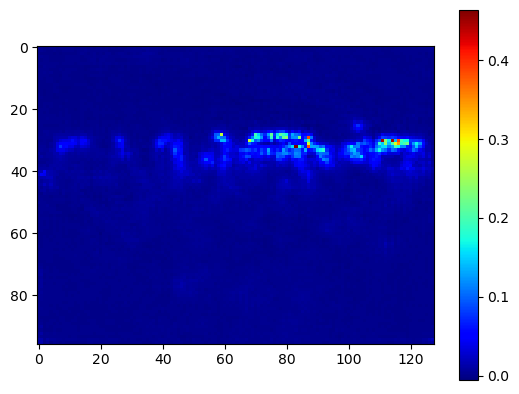

In [21]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

class CSRNet(nn.Module):
    def __init__(self):
        super(CSRNet, self).__init__()
        self.frontend_feat = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512]
        self.backend_feat = [512, 512, 512, 256, 128, 64]
        self.frontend = make_layers(self.frontend_feat)
        self.backend = make_layers(self.backend_feat, in_channels=512, dilation=True)
        self.output_layer = nn.Conv2d(64, 1, kernel_size=1)

    def forward(self, x):
        x = self.frontend(x)
        x = self.backend(x)
        x = self.output_layer(x)
        return x

def make_layers(cfg, in_channels = 3, batch_norm=False, dilation = False):
    if dilation:
        d_rate = 2
    else:
        d_rate = 1
    layers = []
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=d_rate, dilation=d_rate)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)


# 모델 로드
# model_path = './model.pt'  # CSRNet 모델 파일 경로
# model = torch.load(model_path)
# model.eval()  # 모델을 평가 모드로 설정
model = CSRNet()
model_weights = torch.load('./model.pt')
model.load_state_dict(model_weights)
model.eval()
# 이미지를 처리할 트랜스폼 설정
transform = transforms.Compose([
    transforms.Resize((768, 1024)),  # CSRNet 트레이닝에 사용된 입력 크기로 조정
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 이미지 로드 및 변환
image_path = './office_image/19.jpg'  # 테스트할 이미지 경로
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # 배치 차원 추가

# 모델을 사용한 밀도 맵 추정
with torch.no_grad():
    output = model(input_tensor)

# 결과 출력
predicted_density_map = output.squeeze(0).squeeze(0)  # 결과 텐서 차원 감소
print(f"Estimated number of people: {predicted_density_map.sum().item():.2f}")  # 전체 사람 수 추정

# 밀도 맵 시각화
plt.imshow(predicted_density_map.numpy(), cmap='jet')
plt.colorbar()  # 밀도 값의 색상 막대 표시
plt.show()
